## Importing Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Detection of Isolated Points in an Image

Text(0.5, 1.0, 'Isolated Point (Thresholded)')

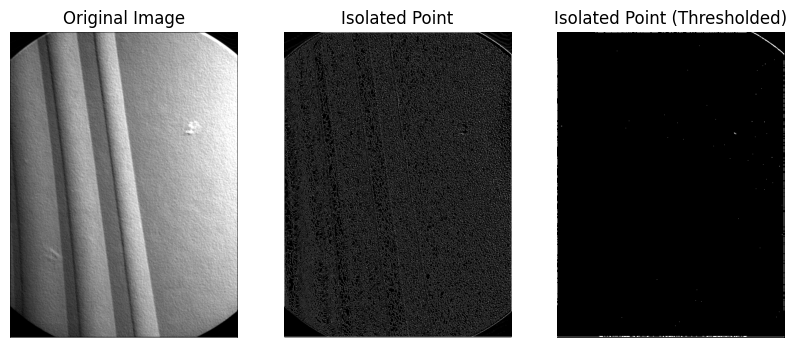

In [35]:
# loading the original image
turbine = cv2.imread('turbine.tif')
turbine = cv2.cvtColor(turbine, cv2.COLOR_BGR2GRAY)
turbine = np.pad(turbine, (1, 1))

# defiining the laplacian kernel
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

# filtering the image with the kernel for point detection
isolated_point = cv2.filter2D(turbine, -1, kernel = kernel)

# allocating memory for output
isolated_point_thresholded = np.zeros((turbine.shape[0], turbine.shape[1]))

# thresholding the image to make the segmentation more clear
T = 800
windowSize = 3
for i in range(isolated_point.shape[0] - (windowSize - 1)):
  for j in range(isolated_point.shape[1] - (windowSize - 1)):
    if np.sum(isolated_point[i: i + windowSize, j: j + windowSize].ravel()) > T:
      isolated_point_thresholded[i, j] = 1
    else:
      isolated_point_thresholded[i, j] = 0

# displaying results
plt.figure(figsize = (10, 20))
plt.subplot(1, 3, 1); plt.axis('off'); plt.imshow(turbine, 'gray'); plt.title('Original Image')
plt.subplot(1, 3, 2); plt.axis('off'); plt.imshow(isolated_point, 'gray'); plt.title('Isolated Point')
plt.subplot(1, 3, 3); plt.axis('off'); plt.imshow(isolated_point_thresholded, 'gray'); plt.title('Isolated Point (Thresholded)')